# Notebook overview
Visualizes successful and failed image downloads and failure reasons with bar charts.

- Loads download-check CSVs files for fine-grain and binary datasets
- Computes totals and counts of successful vs. failed downloads and plots grouped bar charts
- Cleans and aggregates 'image_download_fail_reason' values and visualizes them as stacked/segmented bars
- Saves resulting plots to the results folder

# Preperation

### Imports

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

### Path - df_source_fine_grain_dir

In [2]:
DF_SOURCE_FINE_GRAIN_PATH = r'/home/jleick/masterArbeitProjekt/final_release/data/datasets/origin/fine-grain/download_check'
df_source_fine_grain_dir = Path(DF_SOURCE_FINE_GRAIN_PATH)
if not df_source_fine_grain_dir.exists():
    raise FileNotFoundError(f"Folder does not exist: {DF_SOURCE_FINE_GRAIN_PATH}")

### Path - df_source_binary_dir

In [3]:
DF_SOURCE_BINARY_PATH = r'/home/jleick/masterArbeitProjekt/final_release/data/datasets/origin/binary/download_check'
df_source_binary_dir = Path(DF_SOURCE_BINARY_PATH)
if not df_source_binary_dir.exists():
    raise FileNotFoundError(f"Folder does not exist: {DF_SOURCE_BINARY_PATH}")

### Path - result_dir_path

In [4]:
### Folder to save results
RESULT_DIR_PATH = '/home/jleick/masterArbeitProjekt/final_release/results/image_download/high'
result_dir_path = Path(RESULT_DIR_PATH)
if not result_dir_path.exists():
    raise FileNotFoundError(f"Folder does not exist: {RESULT_DIR_PATH}")

# image_downloaded

## fine_grain

### Load dfs - fine_grain

In [5]:
fine_grain_train_df = pd.read_csv(df_source_fine_grain_dir / '04_ami-gbif_fine-grained_all_train_download_check.csv', index_col=False, usecols=['image_downloaded', 'image_download_fail_reason'])
fine_grain_val_df = pd.read_csv(df_source_fine_grain_dir / '04_ami-gbif_fine-grained_all_val_download_check.csv', index_col=False, usecols=['image_downloaded', 'image_download_fail_reason'])
fine_grain_test_df = pd.read_csv(df_source_fine_grain_dir / '04_ami-gbif_fine-grained_all_test_download_check.csv', index_col=False, usecols=['image_downloaded', 'image_download_fail_reason'])

### calculate - fine_grain_labels, fine_grain_downloads

In [6]:
fine_grain_train_df_downloaded = fine_grain_train_df['image_downloaded'].value_counts().to_dict()
fine_grain_val_df_downloaded = fine_grain_val_df['image_downloaded'].value_counts().to_dict()
fine_grain_test_df_downloaded = fine_grain_test_df['image_downloaded'].value_counts().to_dict()

In [7]:
fine_grain_labels = ('train', 'val', 'test')
fine_grain_downloads = {
    'Total Number': ( len(fine_grain_train_df), len(fine_grain_val_df), len(fine_grain_test_df)),
    'Successful Download': (fine_grain_train_df_downloaded[True], fine_grain_val_df_downloaded[True], fine_grain_test_df_downloaded[True]),
    'Failed Download': (fine_grain_train_df_downloaded[False], fine_grain_val_df_downloaded[False], fine_grain_test_df_downloaded[False])
                    }


### Apply - plot_downloads - fine_grain

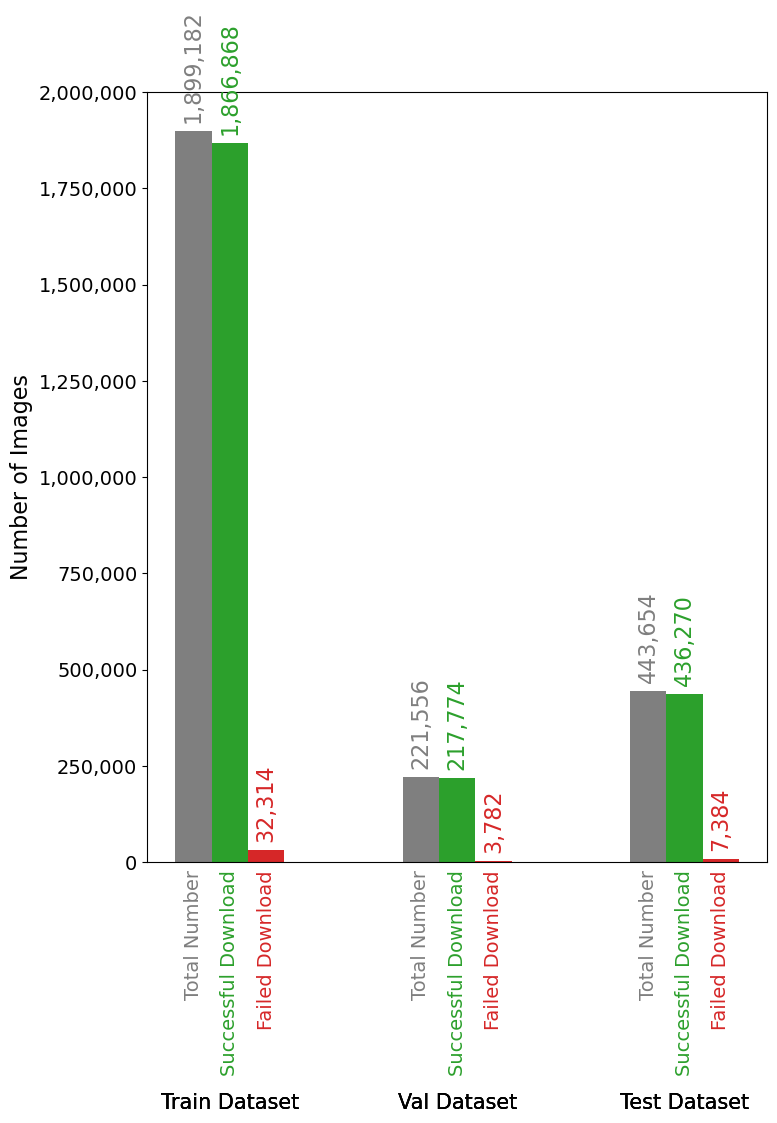

In [13]:
plot_downloads( fine_grain_downloads, fine_grain_labels, 'download_fine-grain_all.pdf')

## binary

### Load dfs - binary

In [8]:
binary_train_df = pd.read_csv(df_source_binary_dir / 'ami-gbif_binary_train_download_check.csv', index_col=False, usecols=['image_downloaded', 'image_download_fail_reason'])
binary_val_df = pd.read_csv(df_source_binary_dir / 'ami-gbif_binary_val_download_check.csv', index_col=False, usecols=['image_downloaded', 'image_download_fail_reason'])
binary_test_df = pd.read_csv(df_source_binary_dir / 'ami-gbif_binary_test_download_check.csv', index_col=False, usecols=['image_downloaded', 'image_download_fail_reason'])

### calculate - binary_labels, binary_downloads

In [9]:
binary_train_df_downloaded = binary_train_df['image_downloaded'].value_counts().to_dict()
binary_val_df_downloaded = binary_val_df['image_downloaded'].value_counts().to_dict()
binary_test_df_downloaded = binary_test_df['image_downloaded'].value_counts().to_dict()

In [10]:
binary_labels = ('train', 'val', 'test')
binary_downloads = {
    'Total Number': ( len(binary_train_df), len(binary_val_df), len(binary_test_df)),
    'Successful Download': (binary_train_df_downloaded[True], binary_val_df_downloaded[True], binary_test_df_downloaded[True]),
    'Failed Download': (binary_train_df_downloaded[False], binary_val_df_downloaded[False], binary_test_df_downloaded[False])
                    }

In [11]:
### Function - plot_downloads

In [12]:
def plot_downloads( downloads: dict, labels: pd.Series, filename: str):
    fig = plt.figure(figsize=(8,10))
    ax = fig.add_subplot(1,1,1)

    x = np.arange(3)
    width = 0.16
    multiplier = 0

    colors = {
        'Total Number': 'tab:gray',
        'Successful Download': 'tab:green',
        'Failed Download': 'tab:red'
    }

    months = ['Train Dataset', 'Val Dataset', 'Test Dataset'] 

    ax.ticklabel_format(style='plain', axis='y')
    ax.tick_params(axis='y', labelsize=14)
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

    for key, values in downloads.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, values, width, label=key , color=colors[key])
        ax.bar_label(rects, labels=[f'{v:,.0f}' for v in values], padding=6, color=colors[key], fontsize=16, rotation=90)
        multiplier += 1

        # Bar labels
        for rect in rects:
            ax.text(
                rect.get_x() + rect.get_width()/2,  # center of bar group
                -20000, # value on y aches, start counting from top left
                key,
                ha='center',
                color=colors[key],
                va='top',
                rotation=90,
                fontsize=14
            )
        
            # Group labels
        for i, month in enumerate(months):
            group_center = x[i] + width * (len(downloads)-1)/2  # center of bar group
            ax.text(
                group_center,
                -600000,  # value on y aches, start counting from top left
                month,
                ha='center',
                va='top',
                fontsize=15
            )

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of Images', fontsize=16)
    # ax.set_title('How completely was the data set downloaded?')
    # ax.legend(loc='upper right', ncols=3)
    ax.set_ylim(0, 2000000) # max is 1866868
    ax.set_xticks([])

    plt.show()
    fig.savefig( result_dir_path / filename, bbox_inches="tight")

### Apply - plot_downloads - binary

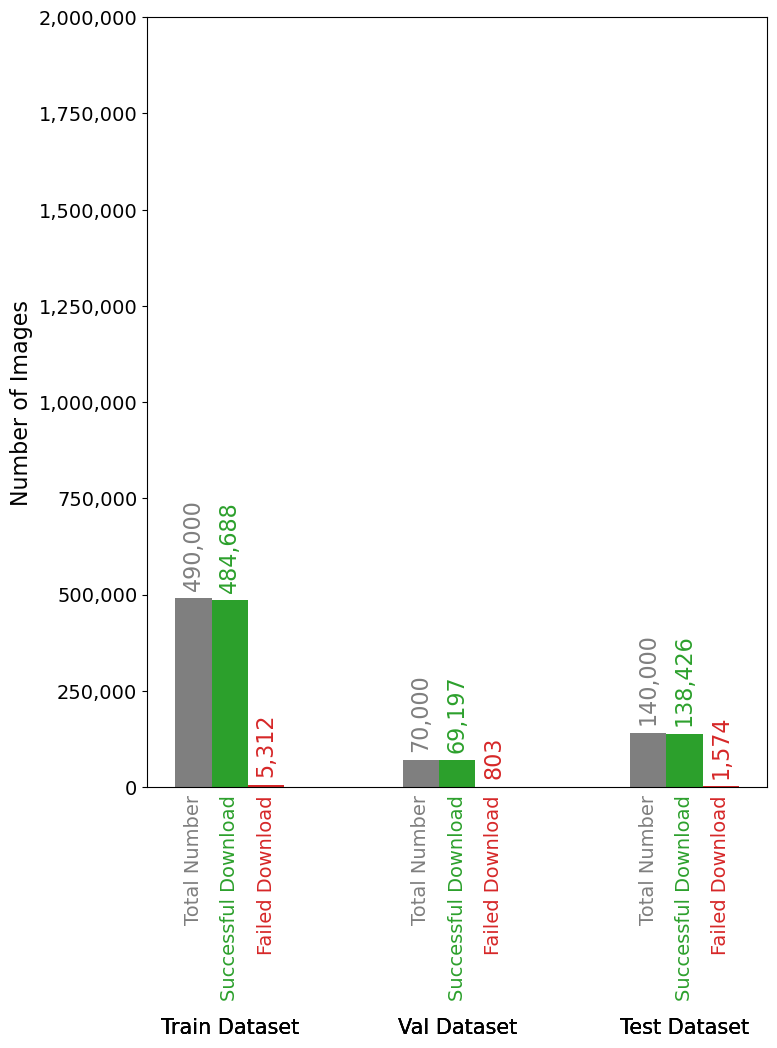

In [14]:
plot_downloads( binary_downloads, binary_labels, 'download_binary.pdf')

# image_download_fail_reason

### print fine_grain - 'image_download_fail_reason'

In [52]:
print(f'train id: {fine_grain_train_df['image_download_fail_reason'].str.extract(r'^([^:]+:[^:]+):|^(.*)$', expand=True).bfill(axis=1).iloc[:, 0].value_counts()} \n' )
print(f'val id: {fine_grain_val_df['image_download_fail_reason'].str.extract(r'^([^:]+:[^:]+):|^(.*)$', expand=True).bfill(axis=1).iloc[:, 0].value_counts()} \n' )
print(f'test id: {fine_grain_test_df['image_download_fail_reason'].str.extract(r'^([^:]+:[^:]+):|^(.*)$', expand=True).bfill(axis=1).iloc[:, 0].value_counts()} \n\n' )

train id: 0
no error                                                                                                            1866868
404 Client Error: Not Found for url                                                                                   31277
HTTPSConnectionPool(host='scan-bugs.org', port=443): Max retries exceeded with url                                      798
HTTPSConnectionPool(host='id.digitarium.fi', port=443): Max retries exceeded with url                                    98
403 Client Error: Forbidden for url                                                                                      56
invalid image file                                                                                                       34
HTTPConnectionPool(host='www.ngbif.org.ng', port=80): Max retries exceeded with url                                      21
HTTPConnectionPool(host='mediaphoto.mnhn.fr', port=80): Max retries exceeded with url                                   

### print binary - 'image_download_fail_reason'

In [33]:
print(f'train id: {binary_train_df['image_download_fail_reason'].str.extract(r'^([^:]+:[^:]+):|^(.*)$', expand=True).bfill(axis=1).iloc[:, 0].value_counts()} \n' )
print(f'val id: {binary_val_df['image_download_fail_reason'].str.extract(r'^([^:]+:[^:]+):|^(.*)$', expand=True).bfill(axis=1).iloc[:, 0].value_counts()} \n' )
print(f'test id: {binary_test_df['image_download_fail_reason'].str.extract(r'^([^:]+:[^:]+):|^(.*)$', expand=True).bfill(axis=1).iloc[:, 0].value_counts()} \n\n' )

train id: 0
no error                                                                                        484688
404 Client Error: Not Found for url                                                               5098
HTTPSConnectionPool(host='monarch.calacademy.org', port=443): Max retries exceeded with url        121
invalid image file                                                                                  77
HTTPConnectionPool(host='www.ngbif.org.ng', port=80): Max retries exceeded with url                  7
403 Client Error: Forbidden for url                                                                  4
HTTPConnectionPool(host='digitalgallery.nhm.org', port=8085): Max retries exceeded with url          4
HTTPSConnectionPool(host='files.plutof.ut.ee', port=443): Read timed out. (read timeout=300)         1
Name: count, dtype: int64 

val id: 0
no error                                                                                       69197
404 Client Error: Not Fou

### merge df column 'image_download_fail_reason'

In [46]:
fine_grain_fail_reasons_s = pd.concat(  [fine_grain_train_df['image_download_fail_reason'],
                                        fine_grain_val_df['image_download_fail_reason'],
                                        fine_grain_test_df['image_download_fail_reason'],
                                        binary_train_df['image_download_fail_reason'],
                                        binary_val_df['image_download_fail_reason'],
                                        binary_test_df['image_download_fail_reason']],
                                        ignore_index=True)

### replace - host value

In [47]:
fine_grain_fail_reasons_clean_host_s = fine_grain_fail_reasons_s.str.replace(r"host='[^']+'", "host='*'", regex=True)

### replace - port value

In [48]:
fine_grain_fail_reasons_clean_port_s = fine_grain_fail_reasons_clean_host_s.str.replace(r"port=\d+", "port=*", regex=True)

### cut - url

In [49]:
fine_grain_fail_reasons_clean_url_s = fine_grain_fail_reasons_clean_port_s.str.extract(r'^([^:]+:[^:]+):|^(.*)$', expand=True).bfill(axis=1).iloc[:, 0]

### Result Fail Reasons of Fine-Grain and Binary combined (column 'image_download_fail_reason')

In [50]:
fine_grain_fail_reasons_clean_url_s.value_counts().sort_index()

0
('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))                        3
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))          9
403 Client Error: Forbidden for url                                                                  68
404 Client Error: Not Found for url                                                               49806
HTTPConnectionPool(host='*', port=*): Max retries exceeded with url                                  51
HTTPSConnectionPool(host='*', port=*): Max retries exceeded with url                               1069
HTTPSConnectionPool(host='*', port=*): Read timed out. (read timeout=300)                             7
invalid image file                                                                                  156
no error                                                                                        3213223
Name: count, dtype: int64

### plot - bar_chart

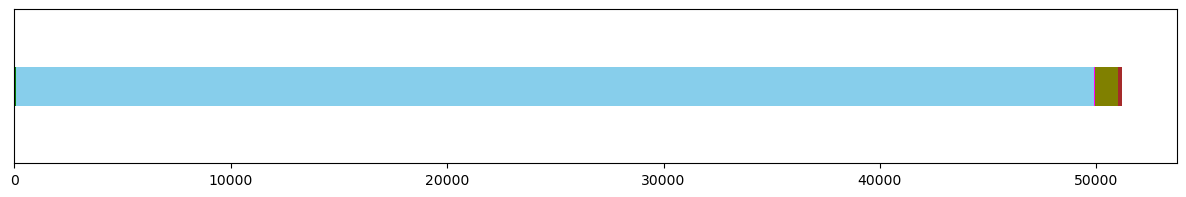

In [51]:
fig = plt.figure(figsize=(15,2))
ax = fig.add_subplot(1,1,1)

labels = [0]
widths = fine_grain_fail_reasons_clean_url_s.value_counts().sort_index().values[:-1]
colors = ['red','blue','green', 'skyblue', 'magenta', 'olive', 'teal', 'brown', 'peru']
starts = 0

widths_cum = widths.cumsum() - widths

rects = ax.barh(labels, widths, left=widths_cum, height=0.25, color=colors, align='center')
ax.set_ylim(-0.5, 0.5)
ax.yaxis.set_visible(False)